### Como leer url

In [1]:
import pandas as pd
import os
medals_url = "http://winterolympicsmedals.com/medals.csv"
medals_data = pd.read_csv(medals_url)
medals_data.head(3)

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold


In [2]:
import csv
import urllib3
http = urllib3.PoolManager()
r = http.request("GET", medals_url)
r.status

200

In [3]:
df_urlib = r.data

In [4]:
cr = csv.reader(df_urlib)

### Ejercicio de descarga de datos usando urlib 
usamos libreria urlib3 y despues convertimos a csv

In [5]:
# el objeto response contiene un string binario , asi que lo convertimos a un string descodificandolo ("utf-8")
encode_medal = df_urlib.decode("utf-8")
# dividimos el string en un array de filas
lista = encode_medal.split("\n")


In [6]:
# creamos variable con nombre columnas
colum_name = lista[0].split(",")

In [7]:
# creationg dict using column names as a keys
gross_dict = {}
for i in colum_name:
    gross_dict[i] = []


In [8]:
# now we add the content to dict
for i in range(len(lista)):
    if (i > 0):
        listado = lista[i].split(",")
        for r in range(len(gross_dict)):
            gross_dict[colum_name[r]].append(listado[r])

In [9]:
df_final = pd.DataFrame(gross_dict)
df_final.head(3)

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold


In [10]:
mainpath = "/Users/gonza/Desktop/CURSOS UDEMY JUAN JOSE GOMILA/python-ml-course-master/python-ml-course-master/datasets"
filename = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath,filename)

In [11]:
data = pd.read_csv(fullpath)
data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
## otras formas de usar pd.read y os.path
data2 = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt" )
data2.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [13]:
data2.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

## Carga datos a traves de funcion open

In [14]:

data3 = open(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt", "r")


In [15]:
cols = data3.readline().strip().split(",")
n_cols = len(cols)

In [16]:
counter = 0
main_dict = {}
for col in cols:
    main_dict[col] = []

In [17]:
for line in data3:
    values = line.strip().split(",")
    for i in range(len(cols)):
        main_dict[cols[i]].append(values[i])
        counter += 1

In [18]:
df3 = pd.DataFrame(main_dict)
df3.head(3)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.


#### Analisis preliminar de datos
las funciones basicasd de resumen, dimensiones, estructura...

In [19]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [20]:
data.isnull().sum() / len(data) *100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

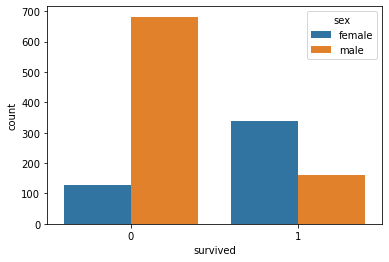

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(data=data, x="survived",hue="sex")

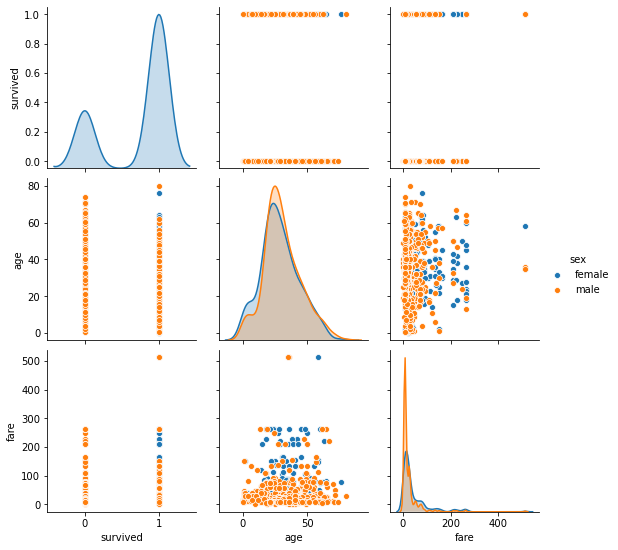

In [22]:
sns.pairplot(data=data[["sex","survived","age","fare"]], hue="sex")

In [23]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [24]:
data_numeric = data.select_dtypes(include=["int64","float64"])

In [25]:
type(data_numeric)

pandas.core.frame.DataFrame

#### Add heatmap from numerical variables

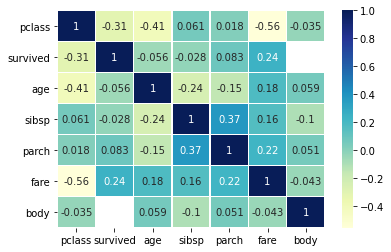

In [26]:
data_corr = data_numeric.corr()
sns.heatmap(data=data_corr, annot=True, cmap="YlGnBu",linewidths=.5)
plt.show()

In [27]:
data_numeric.dtypes

pclass        int64
survived      int64
age         float64
sibsp         int64
parch         int64
fare        float64
body        float64
dtype: object